# Differential expression analysis


You have run the nf-core/rnaseq pipeline and checked the first quality control metrics of your fastq files. This was, however, only the primary analysis and we want to take it further.

Due to the computational demand of the pipeline, you only ran the pipeline on two of the 16 samples in the study yesterday. We provide you an essential output of nf-core/rnaseq pipeline in the `data` folder: It contains the combined epression matrix as produced by Salmon, which provides transcript levels for each gene (rows) and each sample (columns).


We would now like to understand exactly the difference between the expression in our groups of mice. 
Which pipeline would you use for this?

`nf-core/differentialabundance`

Have a close look at the pipeline's "Usage" page on the [nf-core docs](nf-co.re). You will need to create a samplesheet (based on the column names in the provided matrix).

In [7]:
import pandas as pd
matrix = pd.read_csv('data/salmon.merged.gene_counts.tsv', sep='\t', index_col=0)
matrix.head()


,gene_name,Sham_oxy_1,Sham_oxy_2,Sham_oxy_3,Sham_oxy_4,Sham_Sal_1,Sham_Sal_2,Sham_Sal_3,Sham_Sal_4,SNI_oxy_1,SNI_oxy_2,SNI_oxy_3,SNI_oxy_4,SNI_Sal_1,SNI_Sal_2,SNI_Sal_3,SNI_Sal_4
gene_id,,,,,,,,,,,,,,,,,
ENSMUSG00000000001,Gnai3,69.0,294.0,259.0,444.0,242.0,651.0,622.0,406.0,383.0,518.0,349.0,281.0,471.0,46.0,230.0,79.0
ENSMUSG00000000003,Pbsn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSMUSG00000000028,Cdc45,1.0,10.0,2.0,6.0,15.0,15.0,22.0,12.0,9.0,15.0,9.0,8.0,12.0,6.0,5.0,5.0
ENSMUSG00000000031,H19,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
ENSMUSG00000000037,Scml2,12.0,21.0,12.0,18.0,9.0,24.0,36.0,19.0,18.0,26.0,20.0,23.0,26.0,2.0,13.0,1.0


In [19]:

samplesheet = pd.DataFrame()
samplesheet['sample'] = list(matrix.columns[1:])
samplesheet['condition'] = list('_'.join(s.split('_')[:2]) for s in samplesheet['sample'])
samplesheet['replicate'] = list(int(s.split('_')[-1]) for s in samplesheet['sample'])
samplesheet.to_csv('samplesheet.csv', index=False)

In [ ]:
# sample,fastq_1,fastq_2,condition,replicate,batch
# CONTROL_REP1,AEG588A1_S1_L002_R1_001.fastq.gz,AEG588A1_S1_L002_R2_001.fastq.gz,control,1,A
# CONTROL_REP2,AEG588A1_S1_L003_R1_001.fastq.gz,AEG588A1_S1_L003_R2_001.fastq.gz,control,2,B
# CONTROL_REP3,AEG588A1_S1_L004_R1_001.fastq.gz,AEG588A1_S1_L004_R2_001.fastq.gz,control,3,A
# TREATED_REP1,AEG588A2_S1_L002_R1_001.fastq.gz,AEG588A2_S1_L002_R2_001.fastq.gz,treated,1,B
# TREATED_REP2,AEG588A2_S1_L003_R1_001.fastq.gz,AEG588A2_S1_L003_R2_001.fastq.gz,treated,2,A
# TREATED_REP3,AEG588A2_S1_L004_R1_001.fastq.gz,AEG588A2_S1_L004_R2_001.fastq.gz,treated,3,B

Please paste here the command you used. You may need to inspect the provided expression matrix more closely and create additional files, like a samplesheet (based on the column names) or a contrast file (there happens to also be one in `data/` that you can use).

In [ ]:
!nextflow run nf-core/differentialabundance \
     -r 1.5.0 \
     --input samplesheet.csv \
     --contrasts data/contrasts.csv \
     --matrix data/salmon.merged.gene_counts.tsv \
     --genome GRCm38 \
     --outdir differentialabundance  \
     -profile rnaseq,docker \
     -resume


 N E X T F L O W   ~  version 25.04.7

Launching `https://github.com/nf-core/differentialabundance` [irreverent_lovelace] DSL2 - revision: 3dd360fed0 [master]

WARN: Access to undefined parameter `monochromeLogs` -- Initialise it to a default value eg. `params.monochromeLogs = some_value`


------------------------------------------------------
                                        ,--./,-.
        ___     __   __   __   ___     /,-._.--~'
  |\ | |__  __ /  ` /  \ |__) |__         }  {
  | \| |       \__, \__/ |  \ |___     \`-._,-`-,
                                        `._,._,'
  nf-core/differentialabundance v1.5.0-g3dd360f
------------------------------------------------------
Core Nextflow options
  revision                    : master
  runName                     : irreverent_lovelace
  containerEngine             : docker
  container                   : [RMARKDOWNNOTEBOOK:biocontainers/r-shinyngs:1.8.8--r43hdfd78af_0]
  launchDir                   : /mnt/c/Users/NicolaiOs

Explain all the parameters you set and why you set them in this way. If you used or created additional files as input, explain what they are used for.

- `-r`: pipeline version 1.5.0
- `--input`: specify input samplesheet.csv
- `--contrasts`: mapping file specifying which conditions to compare as target to a reference
- `--matrix`: input gene expression matrix. Output from `nf-core/rnaseq` pipeline
- `--genome`: specify reference genome (GRCm38)
- `--outdir`: directory to store results in
- `-profile`: use docker container with rnaseq configuration

What were the outputs of the pipeline?

In [2]:
#!TODO

Would you exclude any samples? If yes, which and why?

In the exploratory PCA plot the samples SNI_Sal_4 and SNI_Sal_2 show a significantly differing profile.

How many genes were differentially expressed in each contrast? Does this confirm what the paper mentions?

| Contrast | Up | Down |
|-------------------------------|----|------|
| SNI_oxy versus SNI_Sal in condition | 1  | 17   |
| Sham_oxy versus Sham_Sal in condition | 7  | 0    |

The paper mentions differentially expressed genes in three brain regions : the NAc, mPFC and VTA. Briefly explain what these 3 regions are.

- NAc, nucleus accumbens: region playing a key role in the processing of rewarding stimuli and reinforcing behaviour
- mPFC, medial prefrontal cortex: responsible for decision-making, cognitive-control and emotions -> important for social behaviour
- VTA, ventral tregmental area: major source of dopamine in the brain

Is there anyway from the paper and the material and methods for us to know which genes are included in these regions?

Once you have your list of differentially expressed genes, do you think just communicating those to the biologists would be sufficient? What does the publication state?

Please reproduce the Venn Diagram from Figure 3, not taking into account the brain regions but just the contrasts mentionned.

In [ ]:
!nextflow run nf-core/differentialabundance \
     -r 1.5.0 \
     --input samplesheet.csv \
     --contrasts data/contrasts_paper.csv \
     --matrix data/salmon.merged.gene_counts.tsv \
     --genome GRCm38 \
     --outdir differentialabundance2  \
     --differential_min_fold_change 0.5 \
     -resume \
     -profile rnaseq,docker


 N E X T F L O W   ~  version 25.04.7



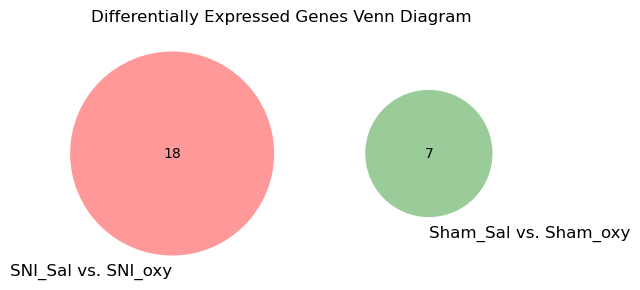

In [22]:
# create Venn diagramm for two conditions "SNI_Sal vs. SNI_oxy" and "Sham_Sal vs. Sham_oxy"
import pandas as pd
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Load gene lists
genes1 = pd.read_csv(
    "differentialabundance/tables/differential/condition_control_treated.deseq2.results_filtered.tsv",
    sep="\t"
)["gene_id"]
genes2 = pd.read_csv(
    "differentialabundance/tables/differential/condition_control_treated_test.deseq2.results_filtered.tsv",
    sep="\t"
)["gene_id"]

# Plot Venn diagram
plt.figure(figsize=(6,4))
venn2([set(genes1), set(genes2)], set_labels=("SNI_Sal vs. SNI_oxy", "Sham_Sal vs. Sham_oxy"))
plt.title("Differentially Expressed Genes Venn Diagram")
plt.show()

/home/n_oswald/miniconda3/envs/cw/lib/python3.13/site-packages/matplotlib_venn/layout/venn3/pairwise.py:169: UserWarning: Bad circle positioning.
  warnings.warn("Bad circle positioning.")


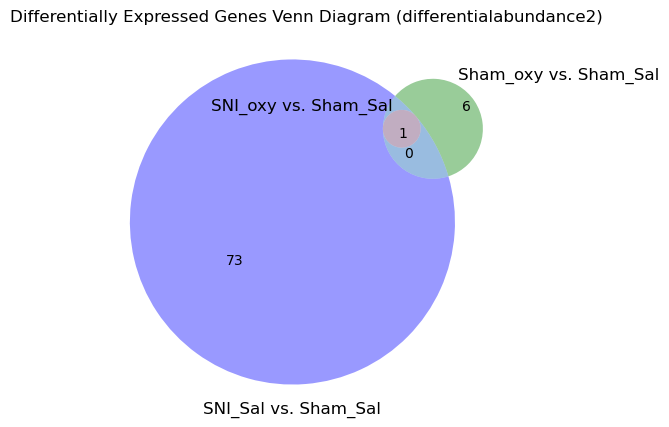

In [ ]:
# Venn diagram for conditions from the paper
import pandas as pd
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Load gene lists
df1 = pd.read_csv("differentialabundance2/tables/differential/condition_control_1.deseq2.results_filtered.tsv", sep="	")
df2 = pd.read_csv("differentialabundance2/tables/differential/condition_control_2.deseq2.results_filtered.tsv", sep="	")
df3 = pd.read_csv("differentialabundance2/tables/differential/condition_control_3.deseq2.results_filtered.tsv", sep="	")
genes1 = df1[df1['padj'] < 0.5]['gene_id']
genes2 = df2[df2['padj'] < 0.5]['gene_id']
genes3 = df3[df3['padj'] < 0.5]['gene_id']

# Plot Venn diagram
plt.figure(figsize=(7,5))
venn3([set(genes1), set(genes2), set(genes3)],
      set_labels=("SNI_oxy vs. Sham_Sal", "Sham_oxy vs. Sham_Sal", "SNI_Sal vs. Sham_Sal"))
plt.title("Differentially Expressed Genes Venn Diagram (differentialabundance2)")
plt.show()